# **Importing Required Libraries:**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# **Loading the Dataset:**

In [ ]:
d=pd.read_csv("/content/SampleSuperstore.csv",encoding='latin1')
df=pd.DataFrame(d)
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


# **Analysing the Dataset**

In [ ]:
df.shape

(9994, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [ ]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

**Sales and profit have moderate positive correlation i.e. as sales increases profit moderately increases.
Discount and Profit have weak negative correlation i.e. as discount increases profit decreases slightly.**

<ipython-input-8-a655709e5250>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

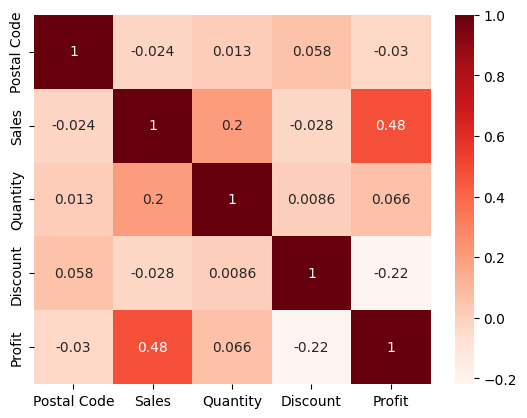

In [ ]:
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='Reds')

# **Handling Null and Duplicate Values:**

In [ ]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.duplicated().sum()

17

In [ ]:
df.duplicated(subset=['Sales'])

0       False
1       False
2       False
3       False
4       False
        ...  
9989     True
9990     True
9991     True
9992     True
9993    False
Length: 9994, dtype: bool

In [ ]:
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


# **VISUALIZING THE DATASET :**

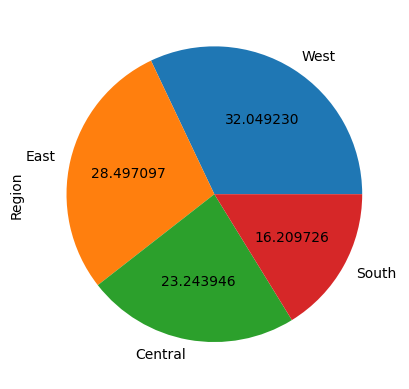

In [ ]:
df["Region"].value_counts().plot.pie(autopct="%2f")
plt.show()

In [ ]:
df.groupby(["Region"]).agg({"Sales":"sum"}).sort_values(by='Sales',ascending=False)

,Sales
Region,
West,725457.8245
East,678781.2400
Central,501239.8908
South,391721.9050


<Axes: ylabel='Region'>

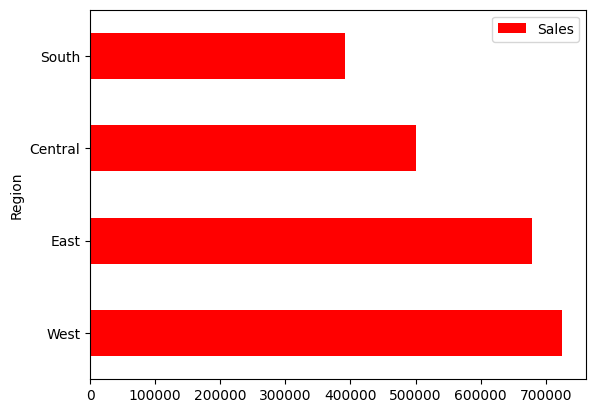

In [ ]:
#Highest Sales are from West region.
df.groupby(["Region"]).agg({"Sales":"sum"}).sort_values(by='Sales',ascending=False).plot(kind='barh',legend=True,color='Red')

<Axes: xlabel='Region'>

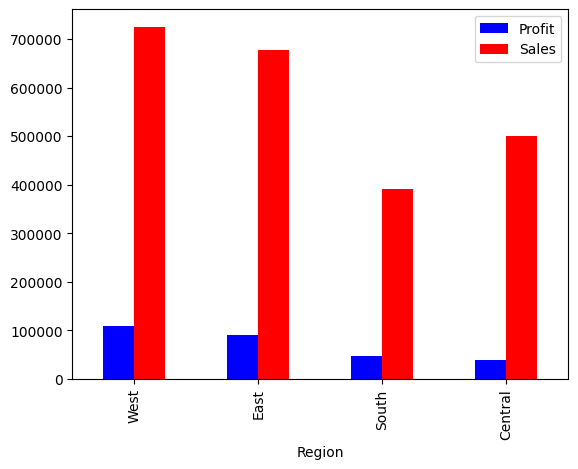

In [ ]:
#Highest Sales and Profit is from West region.
#Lowest Sales are from South Region and lowest profit is from Central Region.

df.groupby('Region')[['Profit','Sales']].sum().sort_values(by='Profit',ascending=False).plot.bar(color=['blue','red'])

In [ ]:
#Sales are only from country United States.
df["Country"].value_counts()

United States    9994
Name: Country, dtype: int64

In [ ]:
#Total Sales: 2.2 Million
#Total Profit: 2 Lakhs 86 Thousand
df.groupby("Country").agg({"Sales":"sum","Profit":"sum"})

,Sales,Profit
Country,,
United States,2.297201e+06,286397.0217


In [ ]:
df.State.value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

<Axes: xlabel='State'>

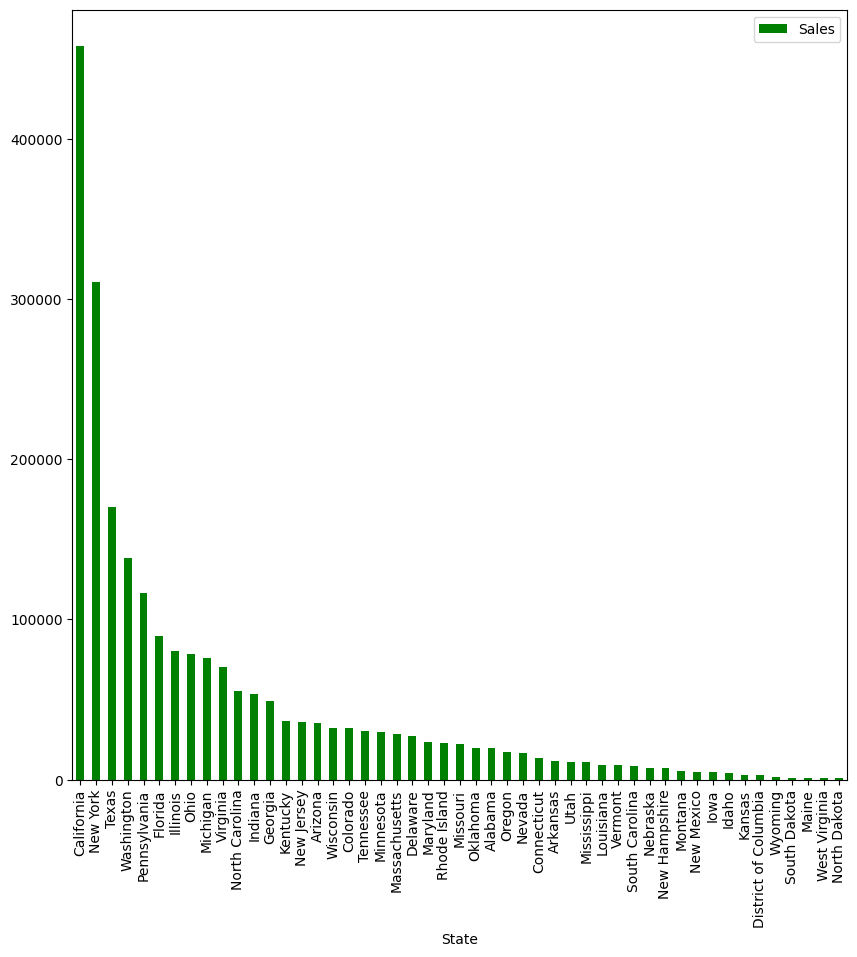

In [ ]:
#Highest Sales are from California and then New York.
#Least Sales are from North Dakota.

x=df.groupby(["State"]).agg({"Sales":"sum"}).sort_values(by='Sales',ascending=False)
x.plot.bar(legend=True,color='green',figsize=(10,10))

<Axes: xlabel='State'>

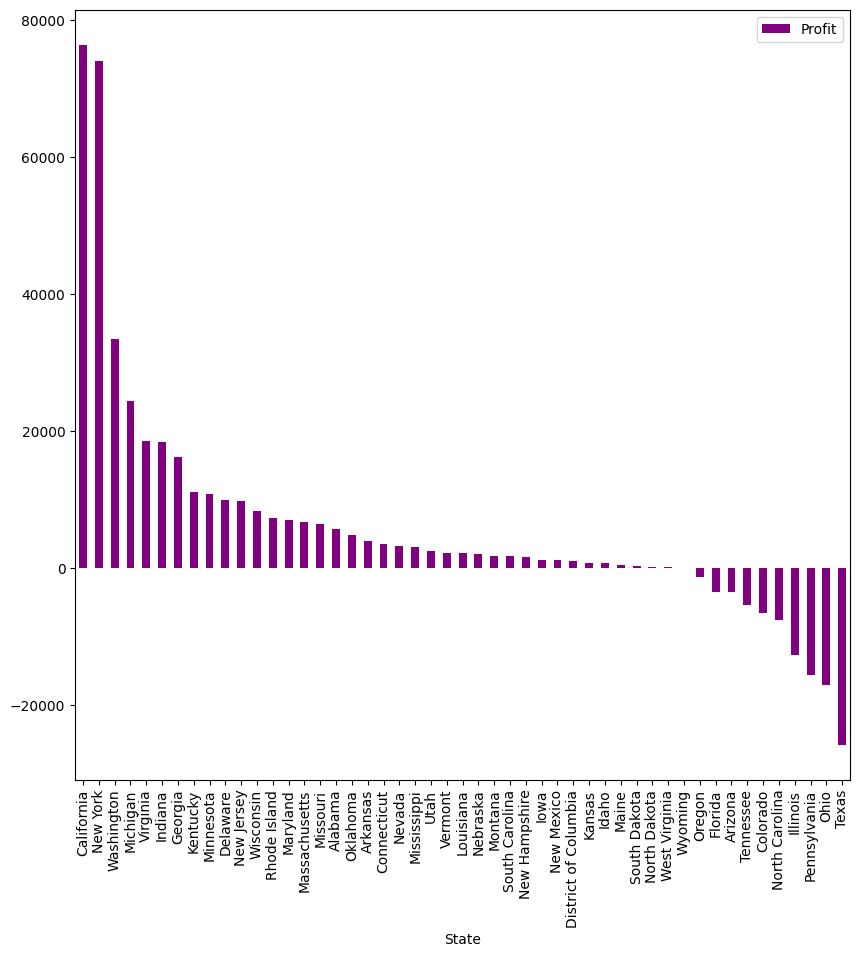

In [ ]:
#Highest Profit is from California and then New York.
#Highest Loss is from Texas.
y=df.groupby(["State"]).agg({"Profit":"sum"}).sort_values(by='Profit',ascending=False)
y.plot.bar(legend=True,color='purple',figsize=(10,10))

In [ ]:
#All the Category of products are contributing almost equally in terms of Sales but Highest is of Technology.
#Highest Profit is also from Technology category and lowest profit is from category Furniture.

df.groupby(["Category"]).agg({"Sales":"sum","Profit":"sum"}).sort_values(by='Sales',ascending=False)

,Sales,Profit
Category,,
Technology,836154.0330,145454.9481
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008


<Axes: xlabel='Category'>

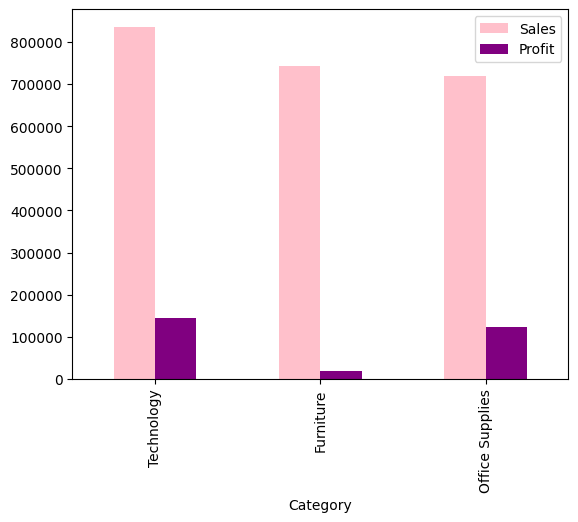

In [ ]:
df.groupby('Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False).plot.bar(color=['pink','purple'],legend=True)

In [ ]:
#Arranging by Highest Sales to Lowest.
df.groupby(["Sub-Category"]).agg({"Sales":"sum","Profit":"sum"}).sort_values(by='Sales',ascending=False)

,Sales,Profit
Sub-Category,,
Phones,330007.0540,44515.7306
Chairs,328449.1030,26590.1663
Storage,223843.6080,21278.8264
Tables,206965.5320,-17725.4811
Binders,203412.7330,30221.7633
Machines,189238.6310,3384.7569
Accessories,167380.3180,41936.6357
Copiers,149528.0300,55617.8249
Bookcases,114879.9963,-3472.5560


In [ ]:
#Arranging by Highest Profit to Lowest Profit.
df.groupby(["Sub-Category"]).agg({"Sales":"sum","Profit":"sum"}).sort_values(by='Profit',ascending=False)

,Sales,Profit
Sub-Category,,
Copiers,149528.0300,55617.8249
Phones,330007.0540,44515.7306
Accessories,167380.3180,41936.6357
Paper,78479.2060,34053.5693
Binders,203412.7330,30221.7633
Chairs,328449.1030,26590.1663
Storage,223843.6080,21278.8264
Appliances,107532.1610,18138.0054
Furnishings,91705.1640,13059.1436


<Axes: ylabel='Sub-Category'>

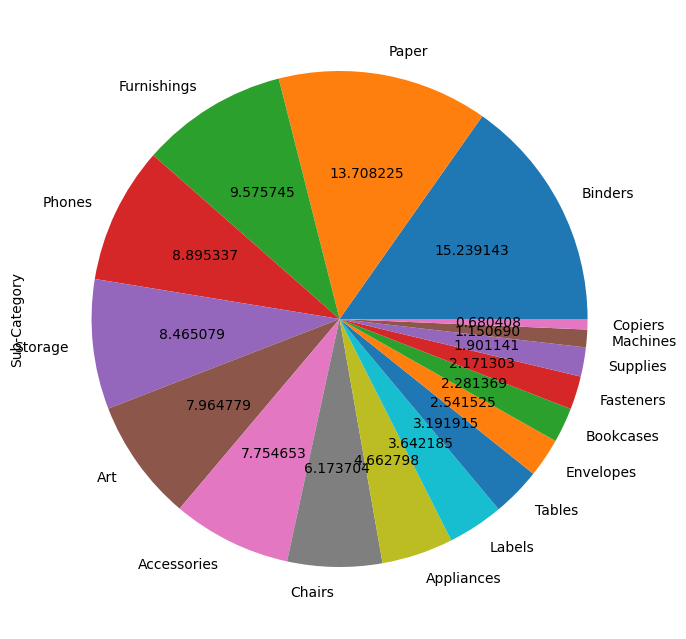

In [ ]:
df["Sub-Category"].value_counts().plot.pie(autopct='%2f',figsize=(8,10))

<Axes: xlabel='Sub-Category'>

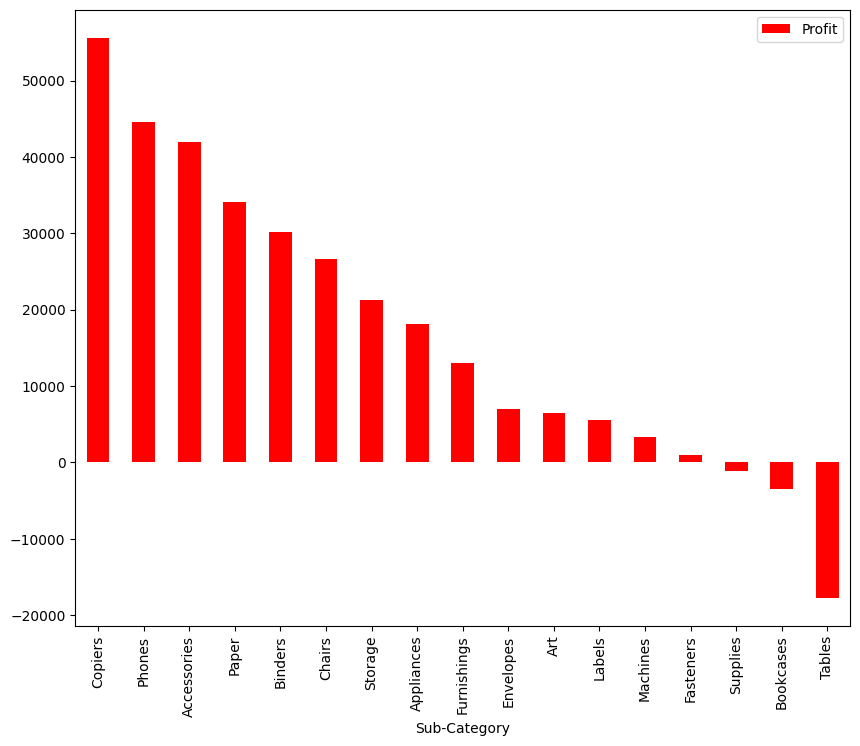

In [ ]:
#Highest Profit: Copiers,Phones,Accessories,Paper.
#Loss:Tables,Bookcases,Supplies.
df.groupby(["Sub-Category"]).agg({"Profit":"sum"}).sort_values(by='Profit',ascending=False).plot.bar(legend=True,color='red',figsize=(10,8))

<Axes: xlabel='Sub-Category'>

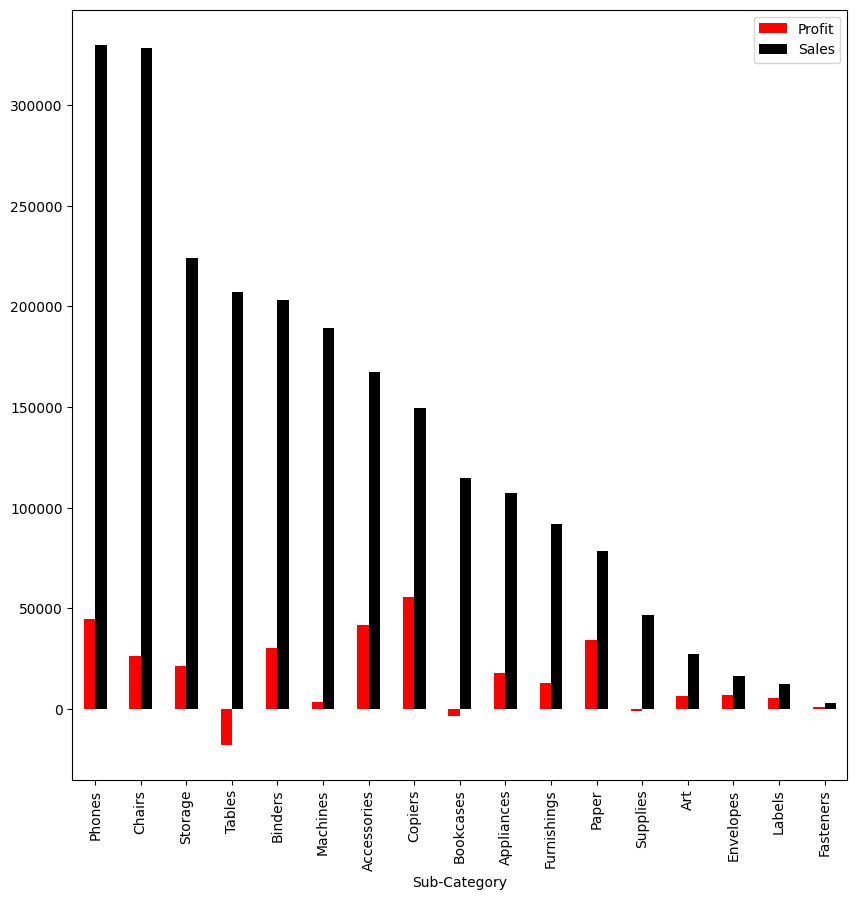

In [ ]:
#Here we can compare the difference between Sales and Profit w.r.t Sub Category
#Sales of Tables are high but no gains only loss.
#Chairs Sales are high but profit compared is low.
df.groupby(["Sub-Category"]).agg({"Profit":"sum","Sales":"sum"}).sort_values(by='Sales',ascending=False).plot.bar(legend=True,color=['red','black'],figsize=(10,10))

In [ ]:
df.Segment.value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

<Axes: xlabel='Segment'>

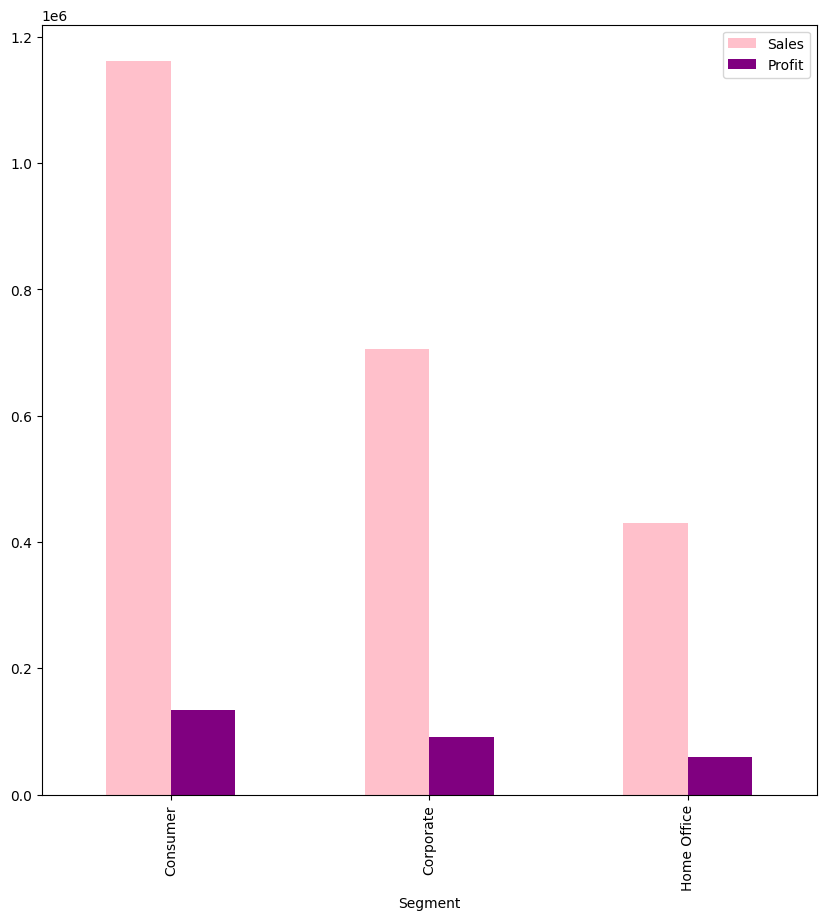

In [ ]:
df.groupby('Segment')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False).plot.bar(color=['pink','purple'],figsize=(10,10))

In [ ]:
df["Ship Mode"].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

<Axes: xlabel='Ship Mode'>

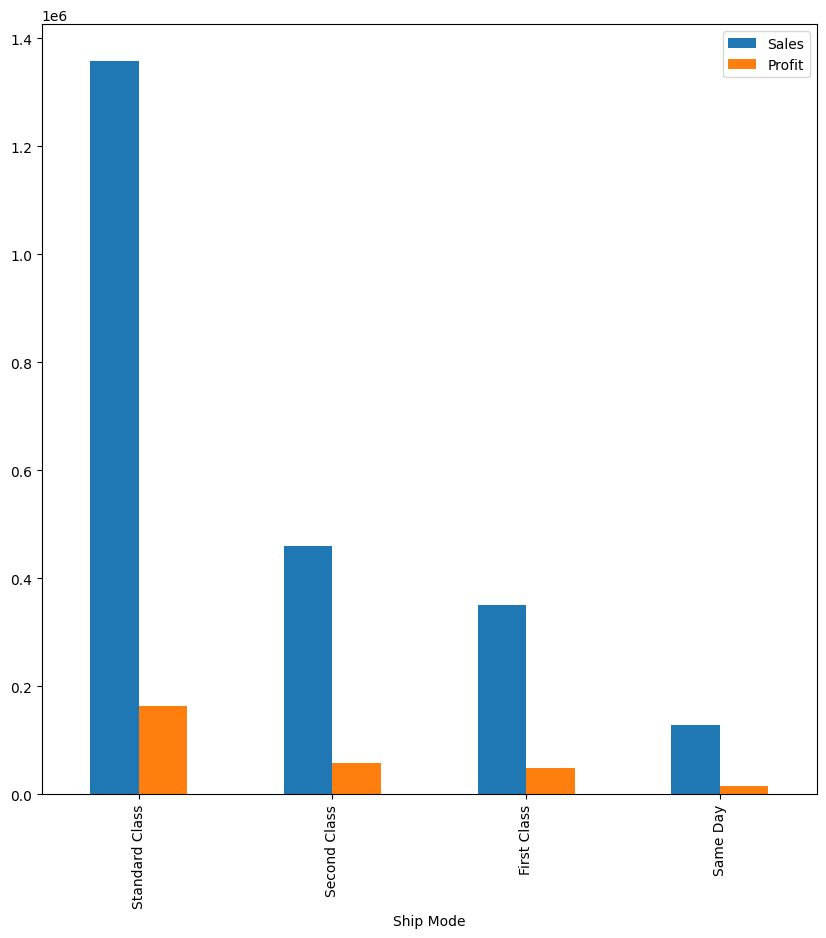

In [ ]:
#Highest Sales and Profit are through Standard Class Shipment Mode.
#lowest Sales and Profit is through Same Day Shipment Mode.
df.groupby('Ship Mode')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False).plot.bar(figsize=(10,10))

<Axes: xlabel='Discount', ylabel='Profit'>

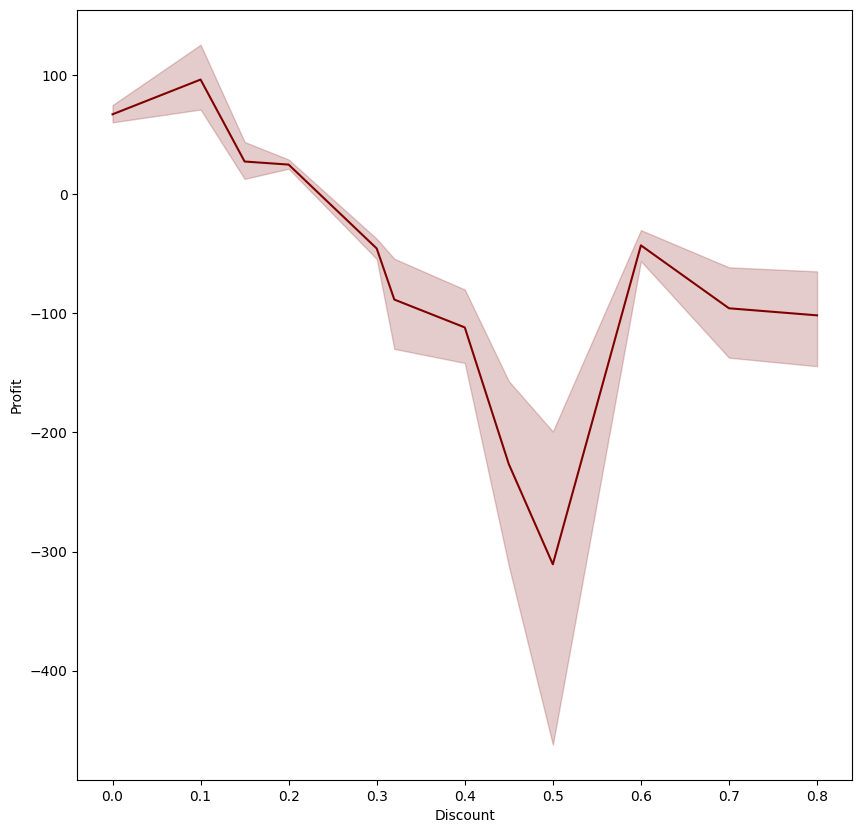

In [ ]:
plt.figure(figsize=(10,10))
sns.lineplot(x='Discount',y='Profit',data=df,color='maroon')

<Axes: xlabel='Sales', ylabel='Profit'>

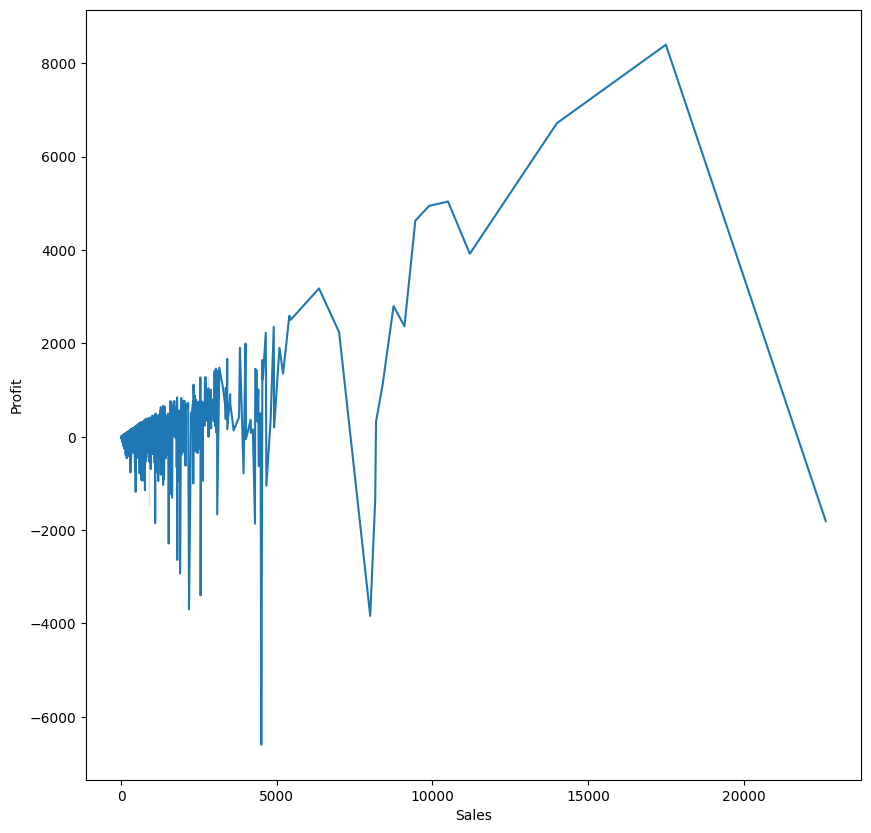

In [ ]:
plt.figure(figsize=(10,10))
sns.lineplot(x='Sales',y='Profit',data=df)

<Axes: xlabel='Quantity', ylabel='Discount'>

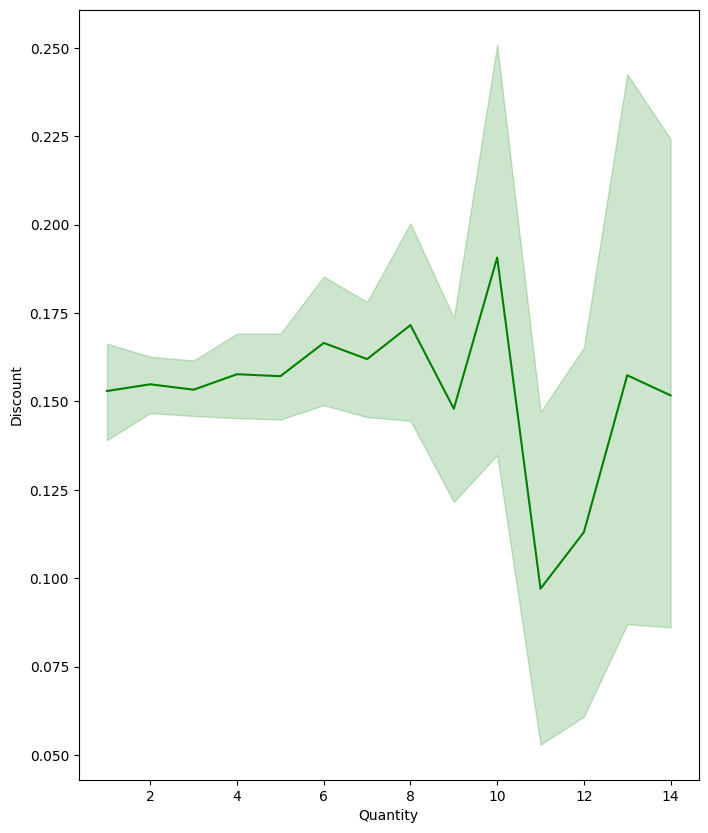

In [ ]:
plt.figure(figsize=(8,10))
sns.lineplot(x='Quantity',y='Discount',color='green',data=df)

<Axes: xlabel='Quantity', ylabel='Sales'>

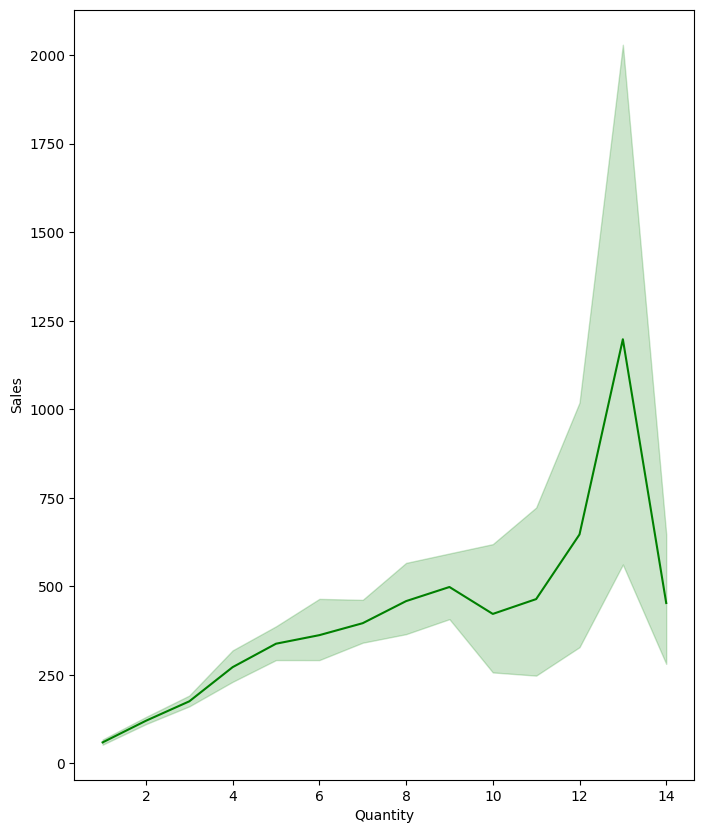

In [ ]:
plt.figure(figsize=(8,10))
sns.lineplot(x='Quantity',y='Sales',color='green',data=df)

<Axes: xlabel='Category'>

<Figure size 800x800 with 0 Axes>

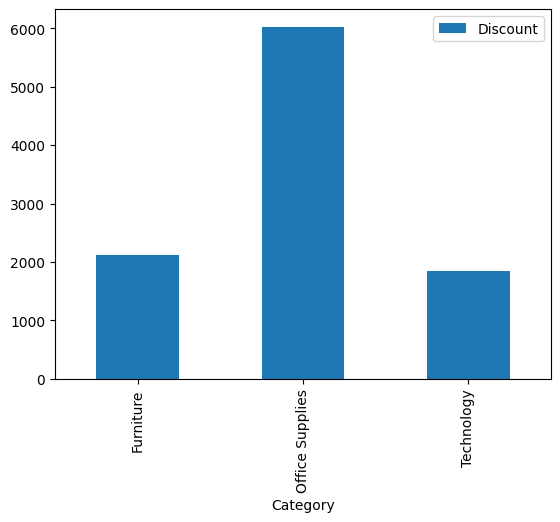

In [ ]:
#Highest discount is given on  products of category Office Supplies and lowest on category Technology
plt.figure(figsize=(8,8))
df.groupby('Category')[['Discount']].count().plot.bar(legend=True)

<Axes: xlabel='Sub-Category'>

<Figure size 1000x1000 with 0 Axes>

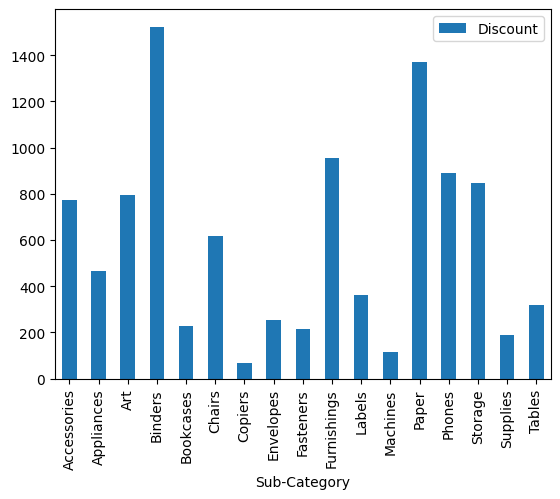

In [ ]:
#Sub-Category vs Discount
plt.figure(figsize=(10,10))
df.groupby('Sub-Category')[['Discount']].count().plot.bar(legend=True)